In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the dataset

In [2]:
df = pd.read_csv('Life_Expectancy_With_Class.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,High_Life_Expectancy
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


cheak of the data

In [3]:
df.shape

(2938, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

cheak the missing values

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
High_Life_Expectancy                 0
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
High_Life_

check the duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

check the garbage values

In [8]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***"*10)

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
******************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
******************************


Exploratory data analysis

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [10]:
df.describe(include='object').T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


understand the distribution

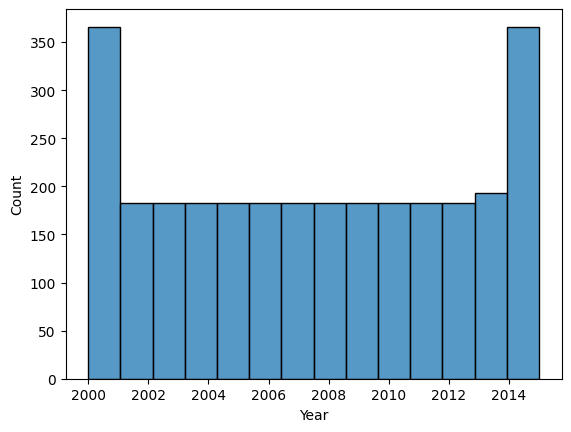

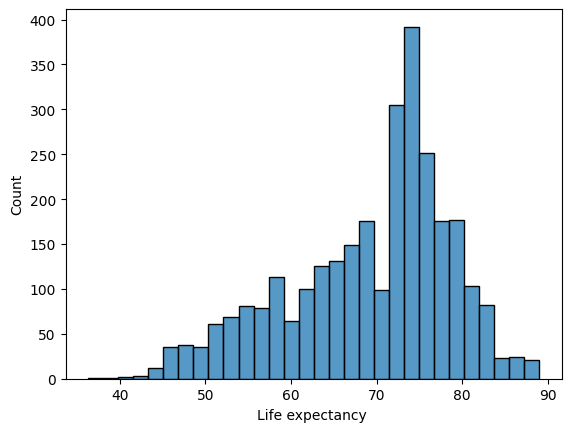

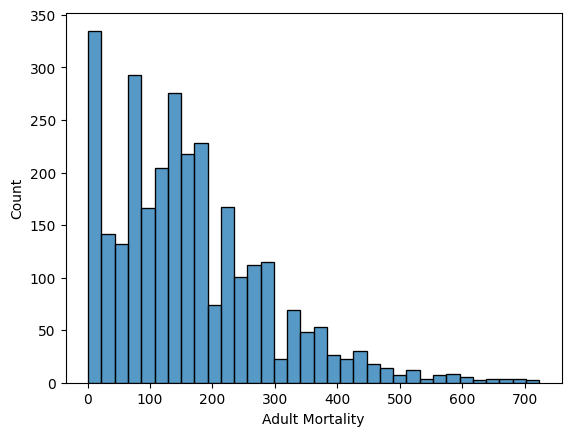

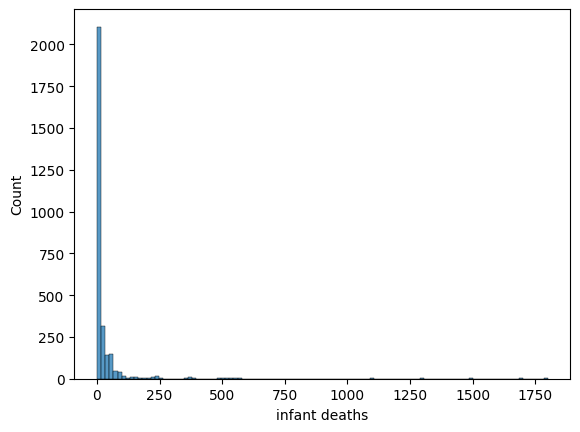

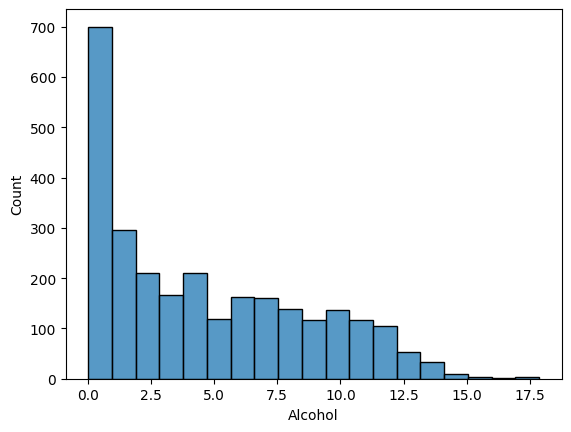

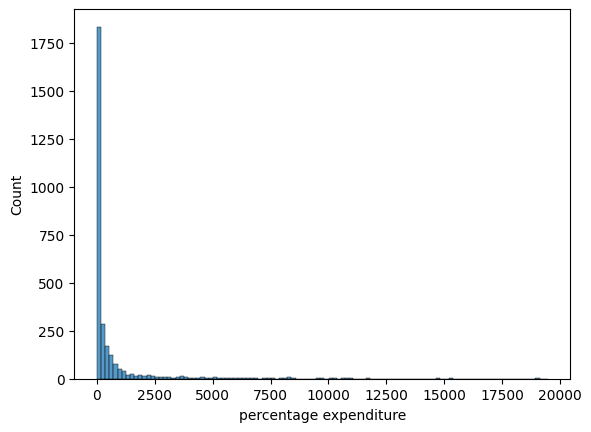

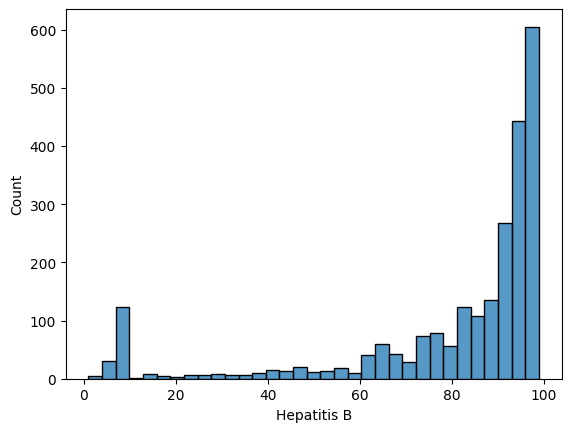

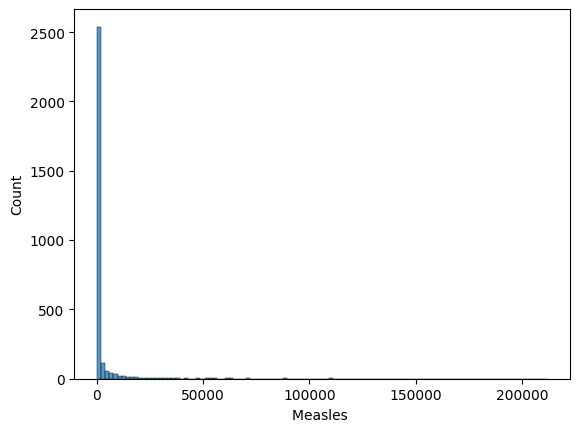

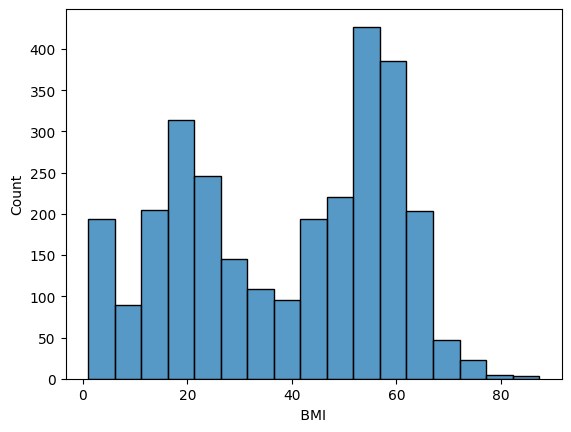

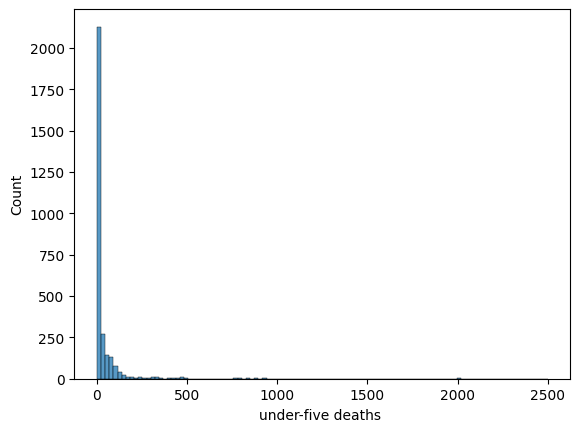

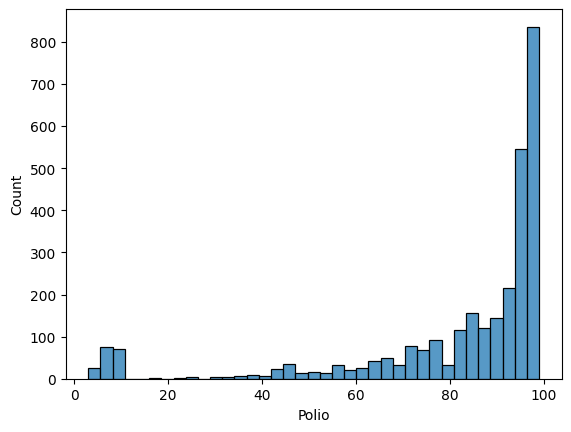

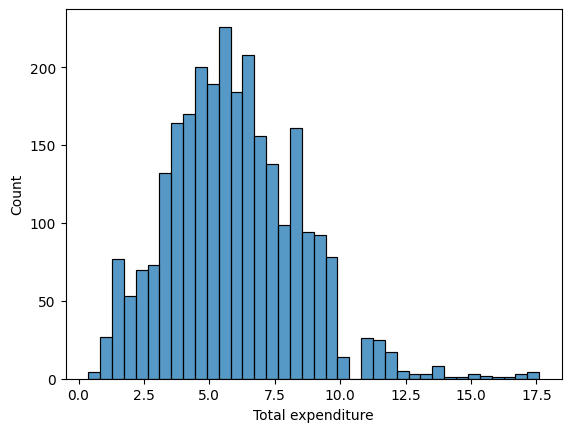

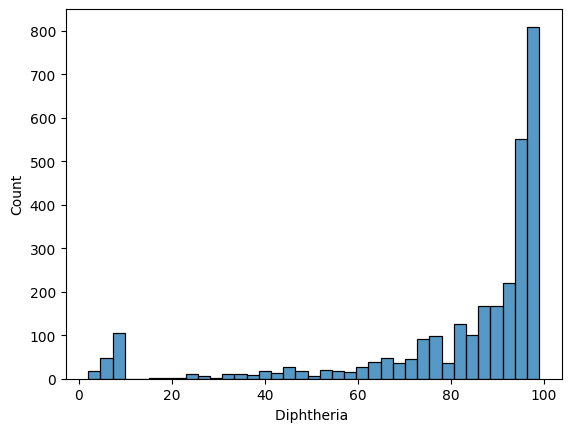

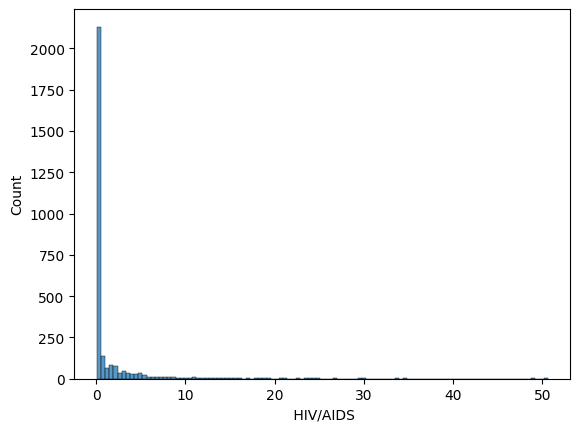

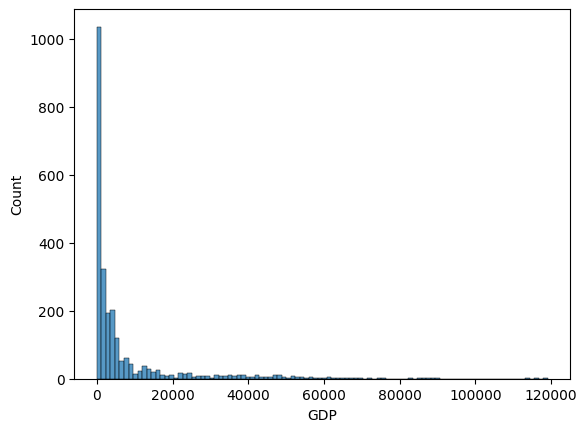

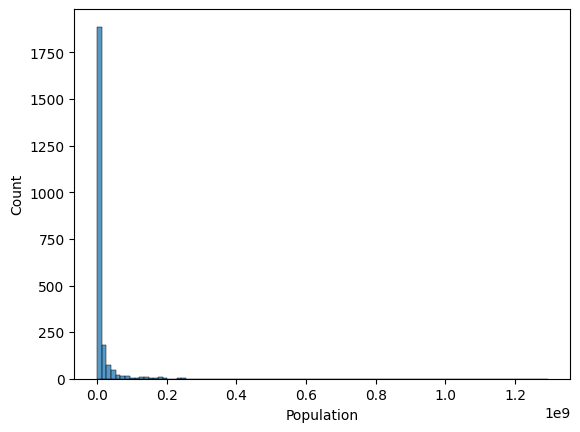

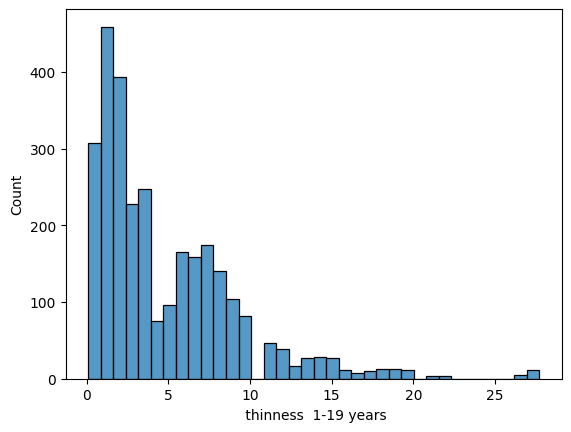

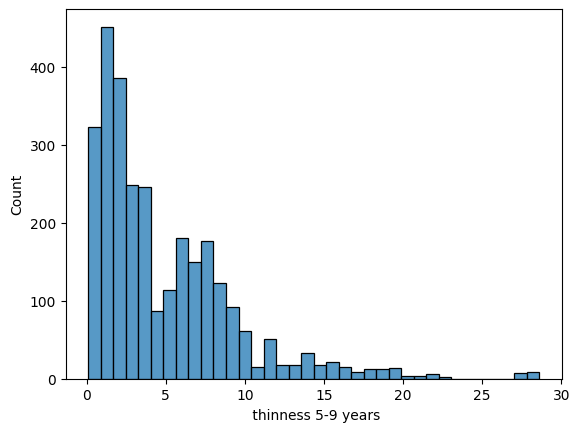

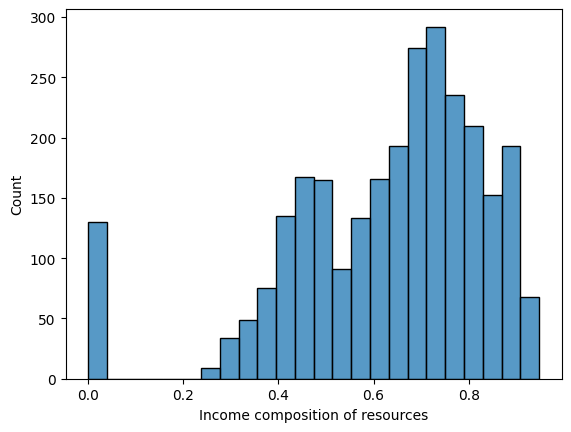

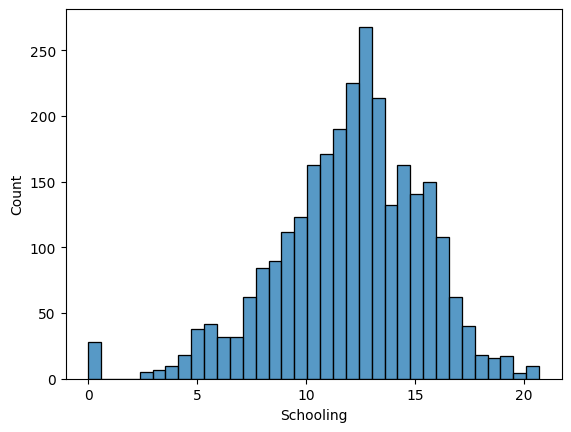

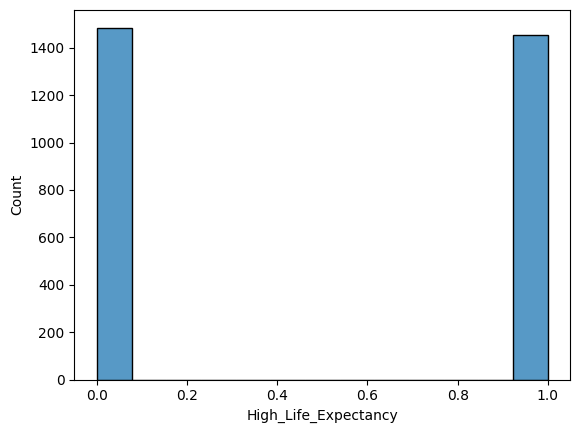

In [11]:
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data = df, x = i)
    plt.show()

identify the outliers

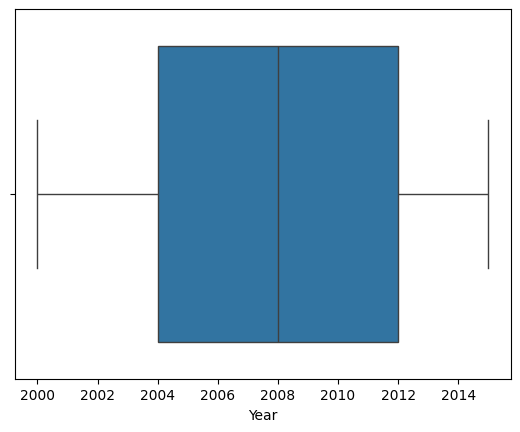

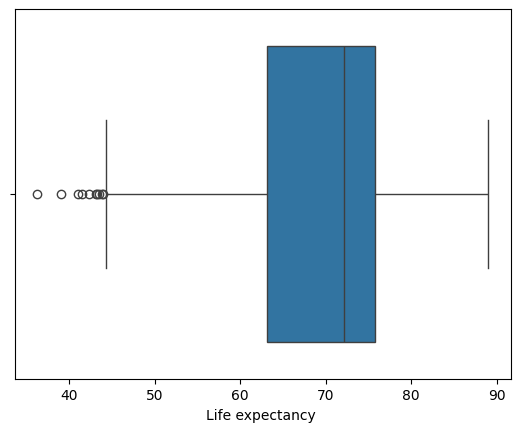

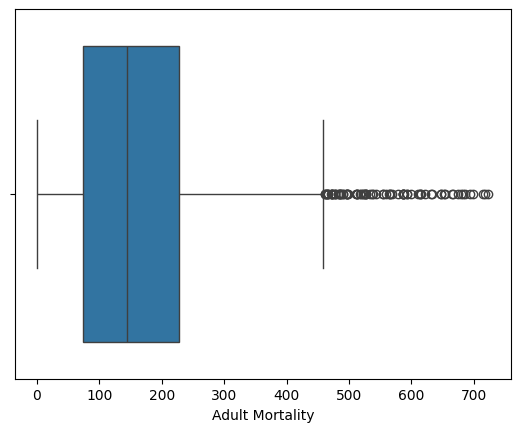

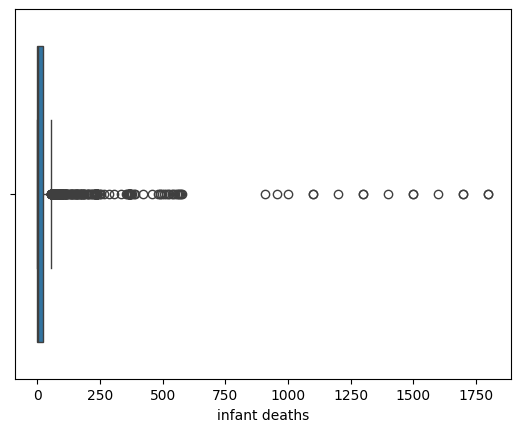

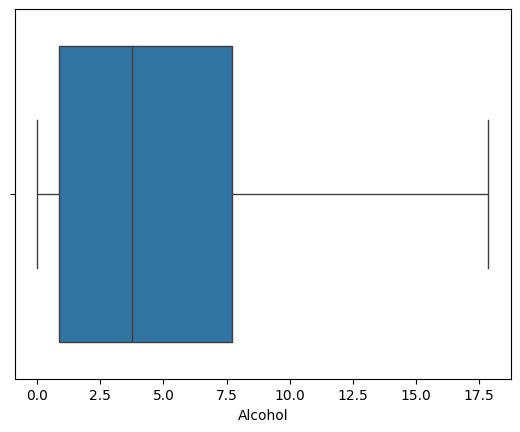

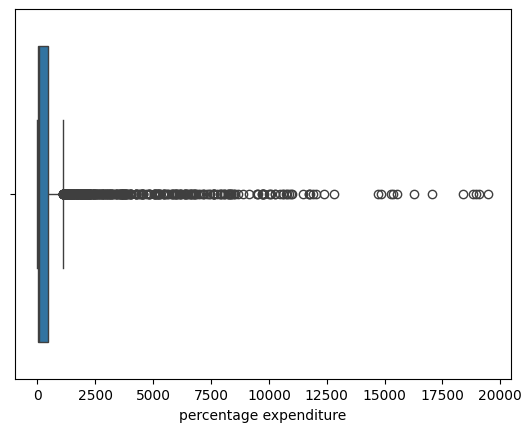

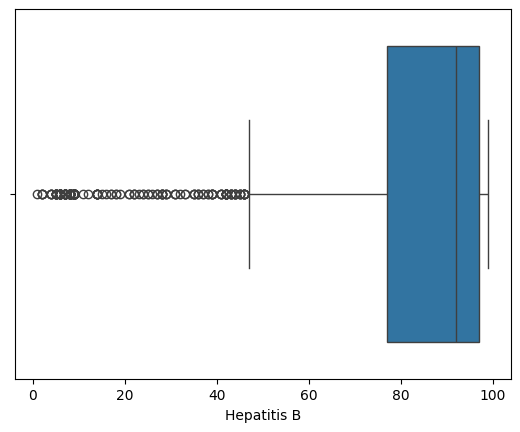

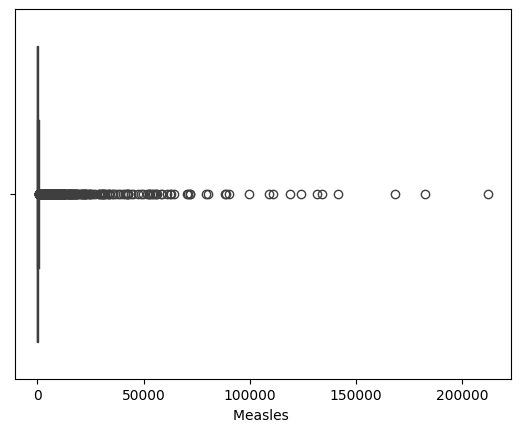

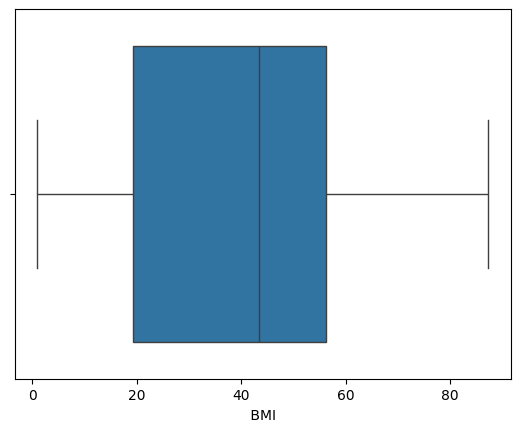

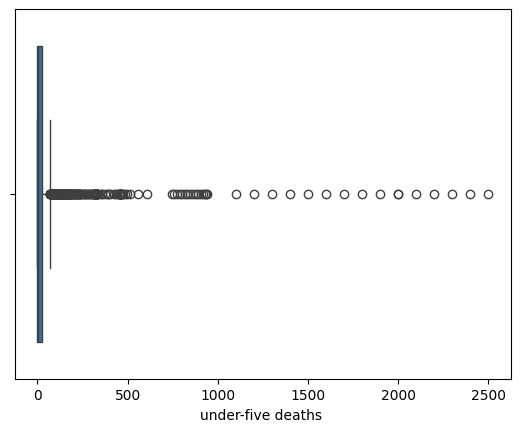

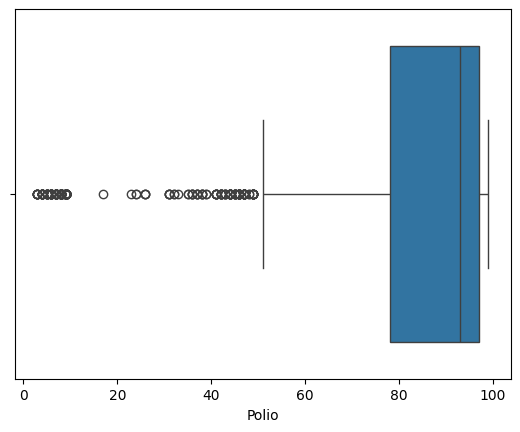

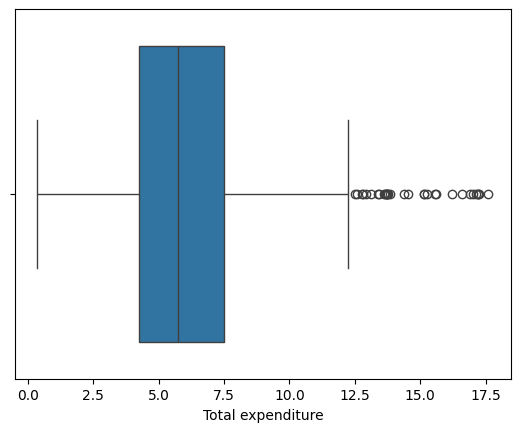

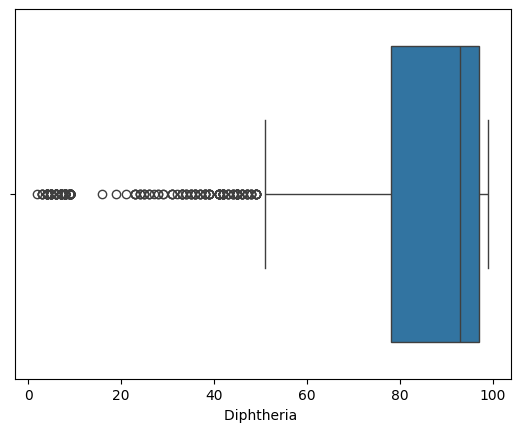

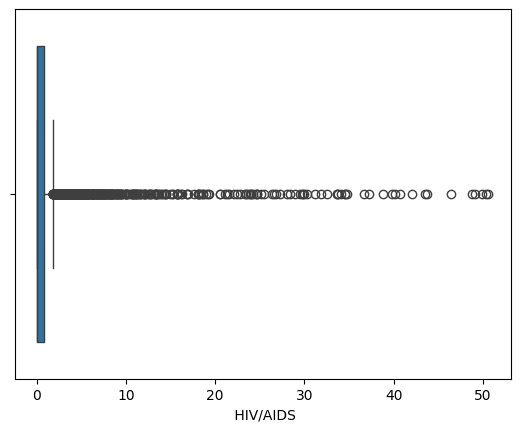

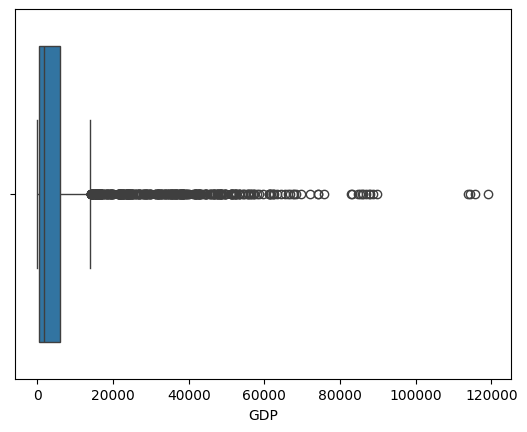

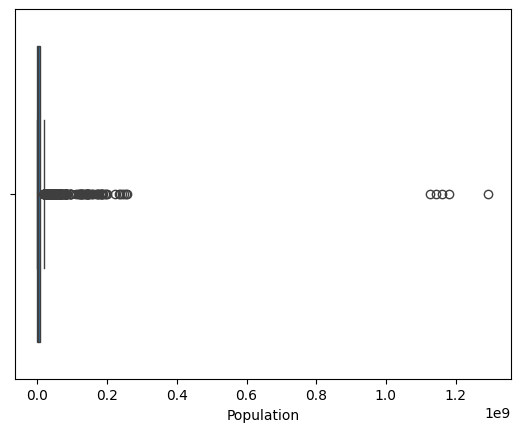

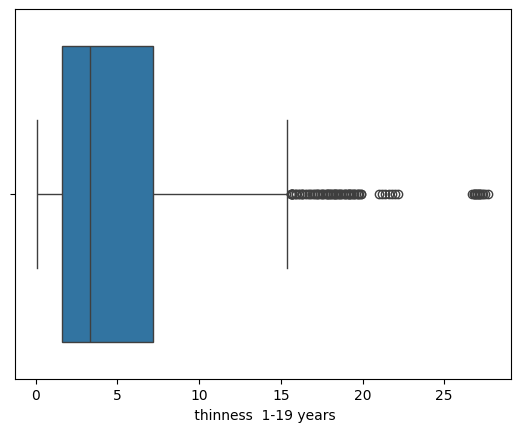

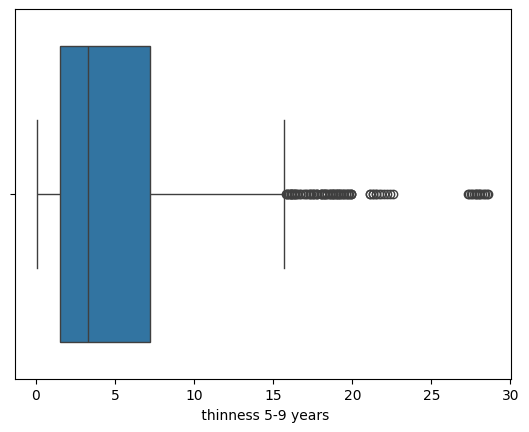

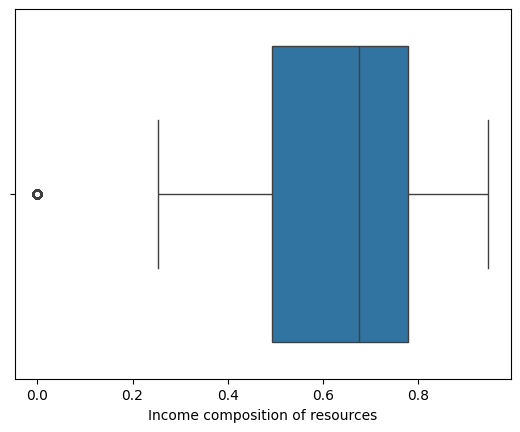

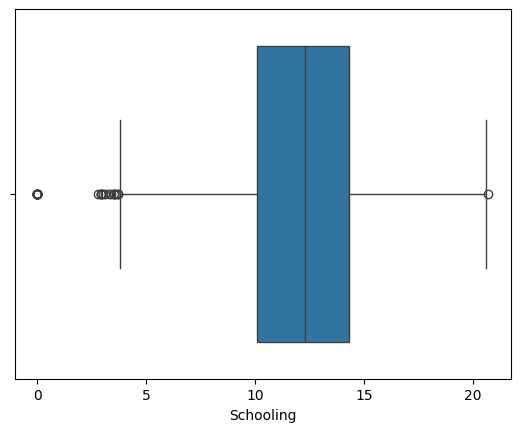

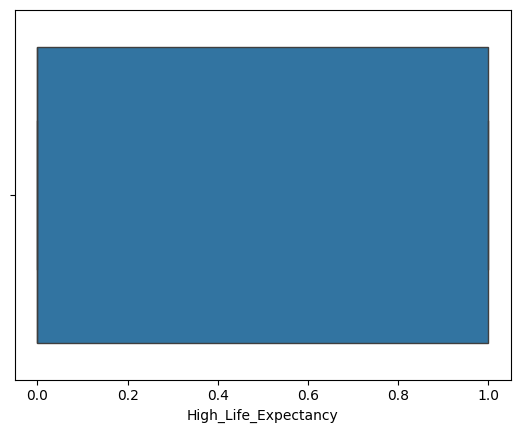

In [12]:
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data = df, x = i)
    plt.show()

scatter plot to understand the relationship bettween the data

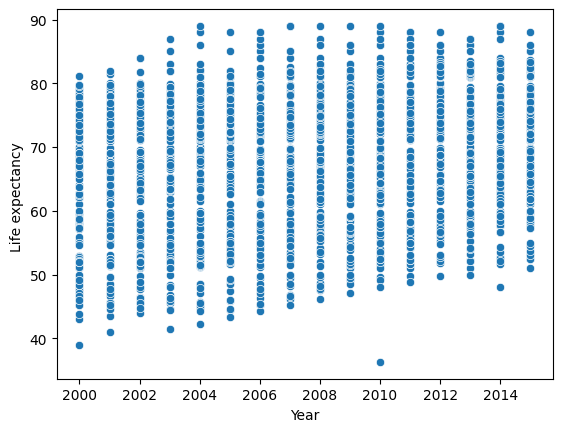

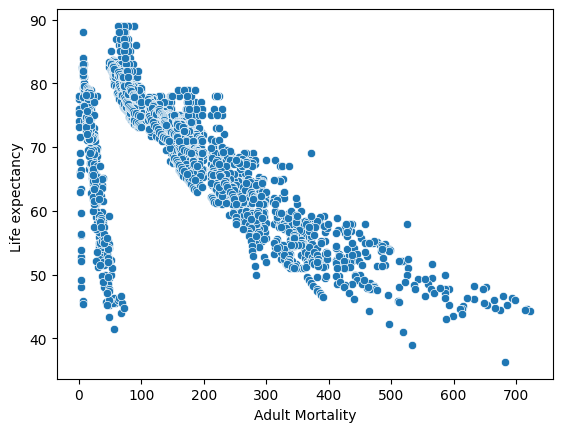

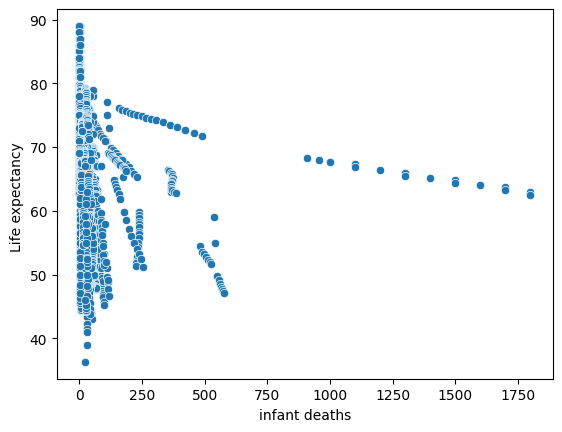

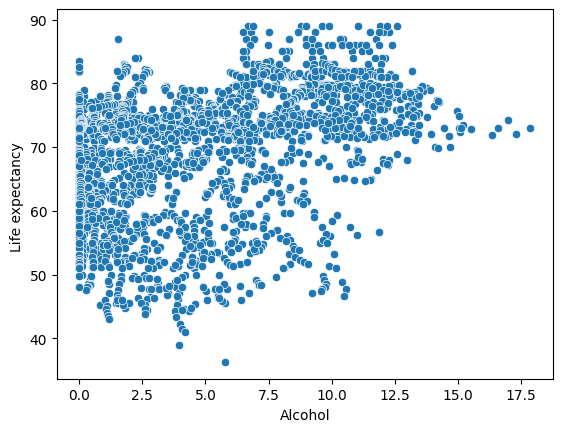

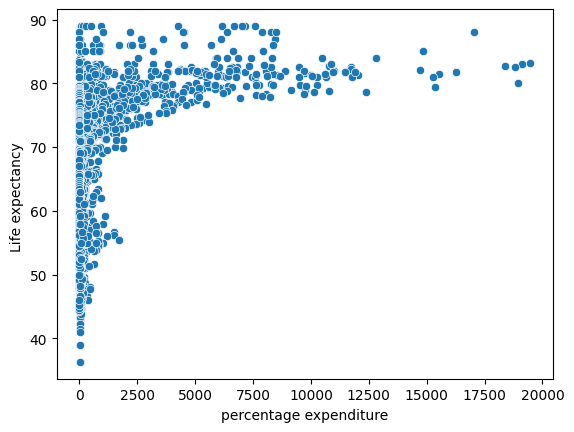

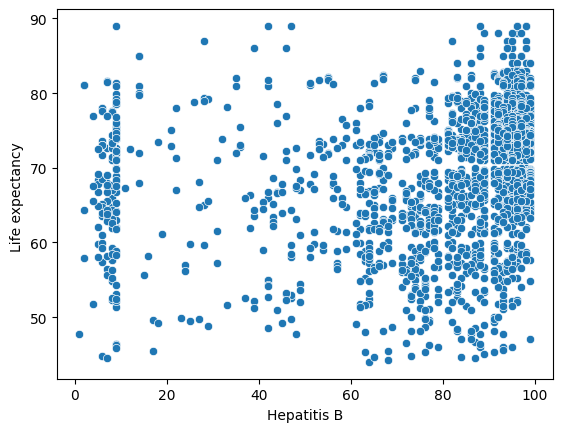

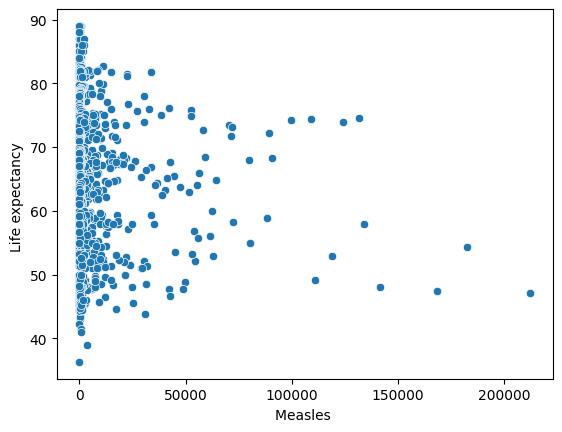

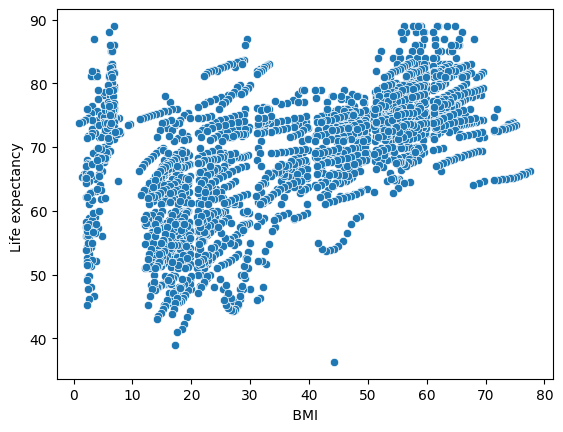

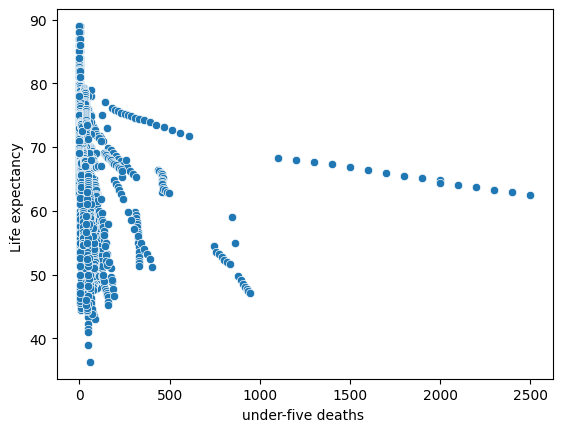

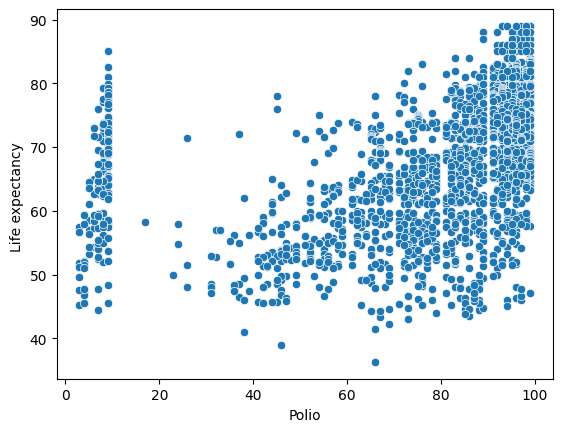

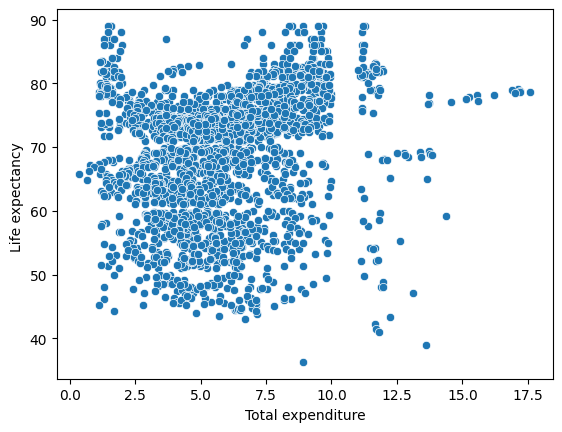

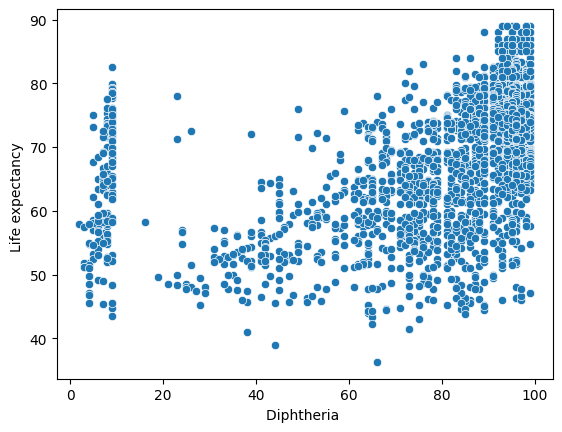

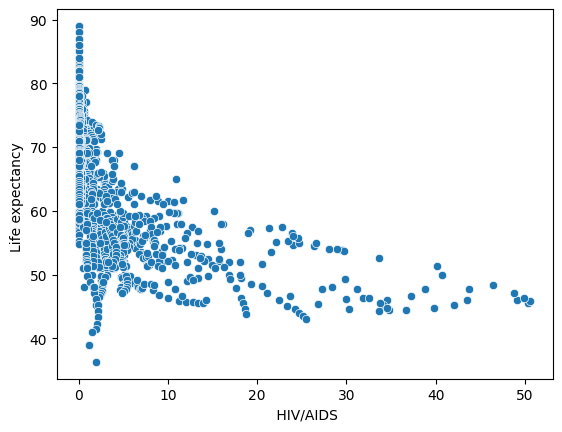

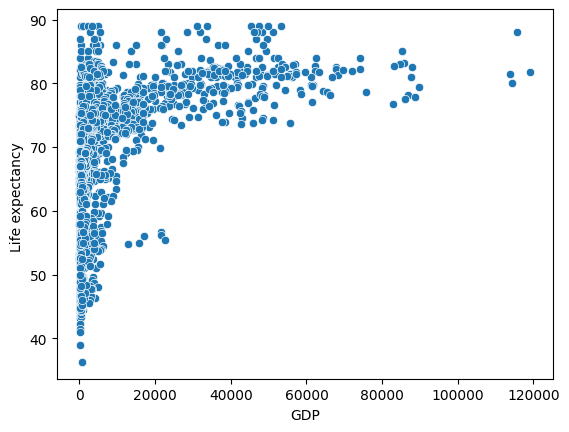

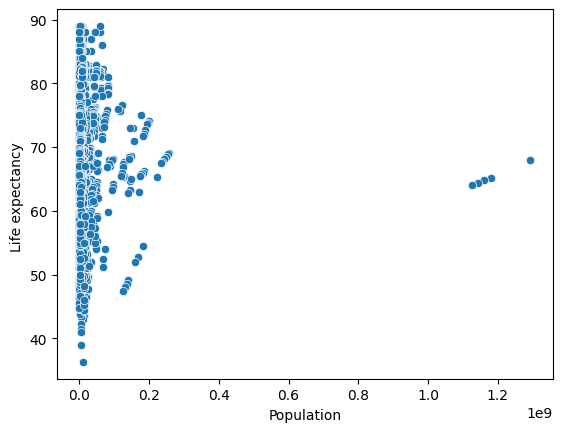

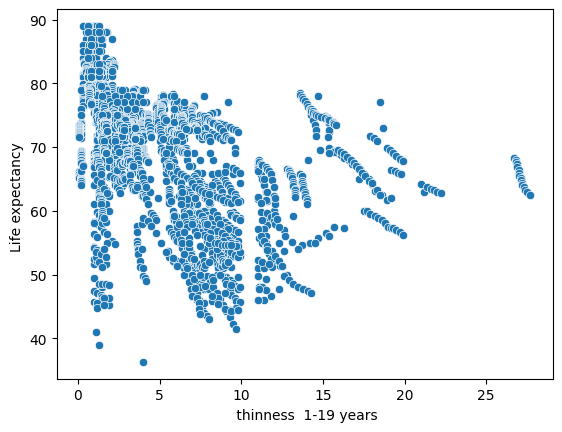

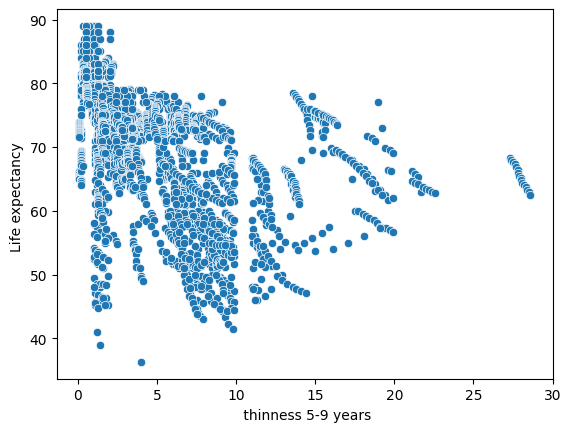

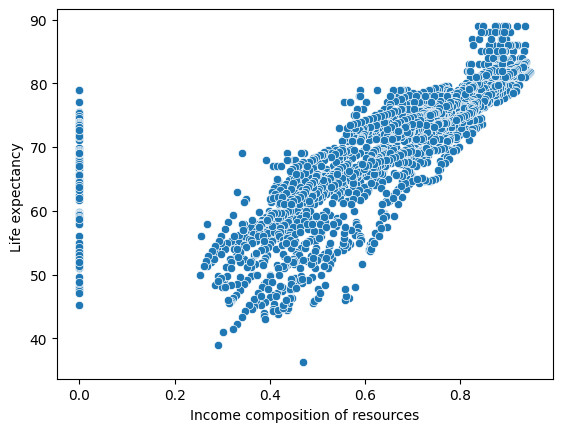

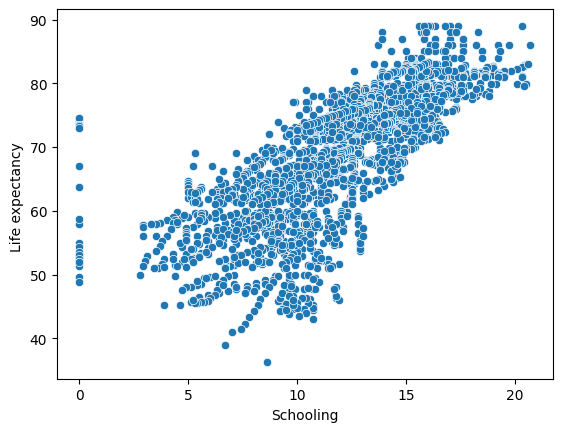

In [13]:
for i in ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'] :
    sns.scatterplot(data = df, x = i, y = 'Life expectancy ')
    plt.show()

In [14]:
df.select_dtypes(include="number").columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'High_Life_Expectancy'],
      dtype='object')

correlation

In [15]:
s=df.select_dtypes(include="number").corr()

<Axes: >

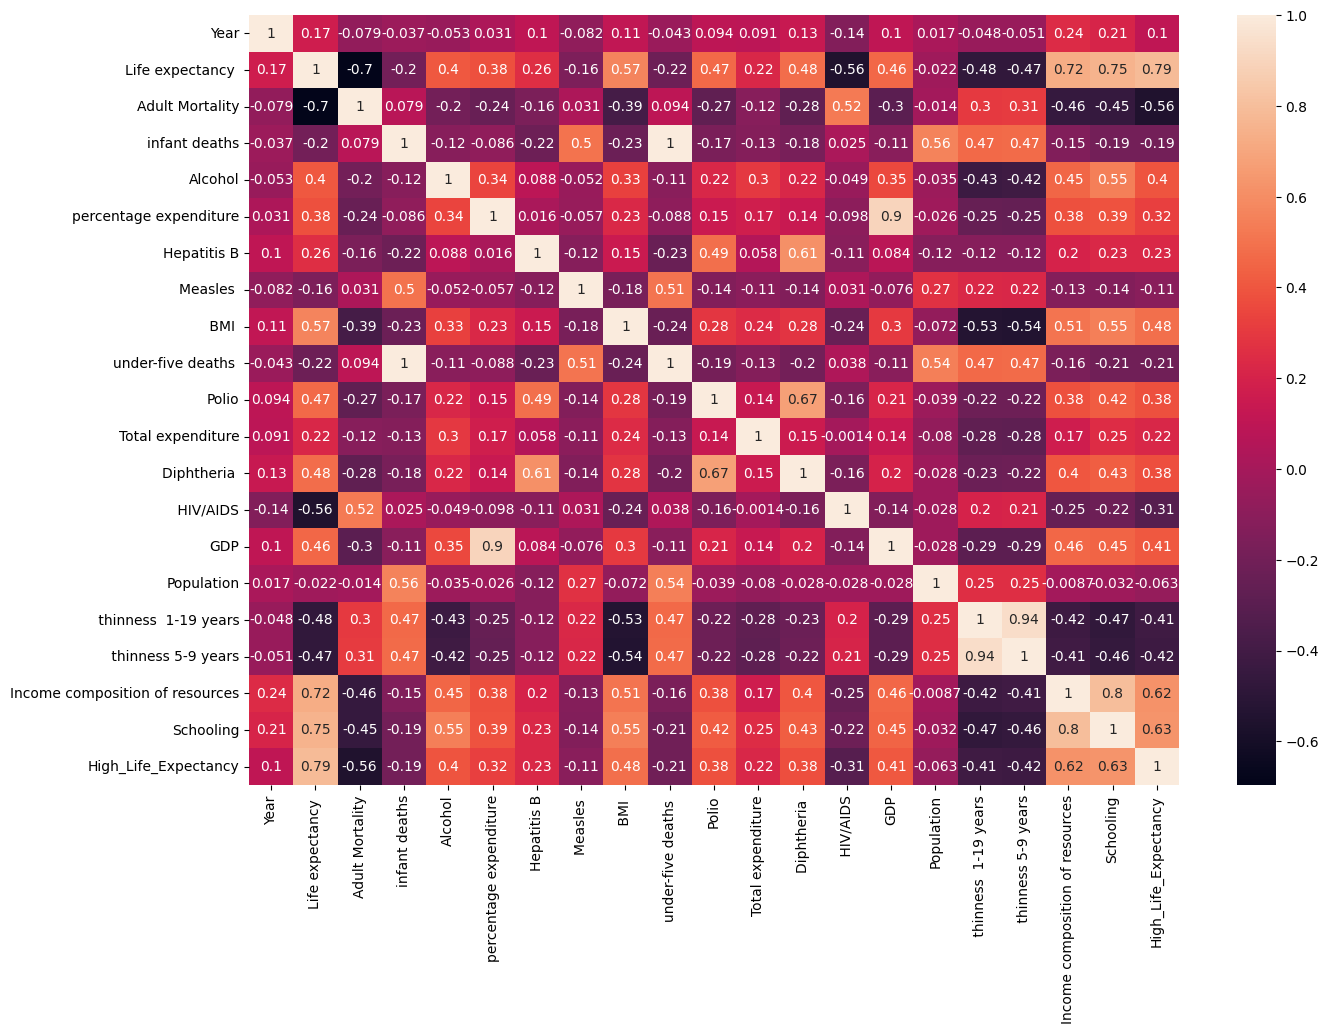

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(s, annot=True)

missing value treatments

In [17]:
for i in [' BMI ', 'Polio', 'Income composition of resources']:
    df[i].fillna(df[i].median(), inplace=True)

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [19]:
for i in df.select_dtypes(include=['number']).columns:
    df[i] = imputer.fit_transform(df[[i]])

In [20]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
High_Life_Expectancy               0
dtype: int64

outliers treatments

In [21]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw     

In [22]:
wisker(df['GDP'])

(np.float64(-9773.52021495771), np.float64(17837.165679596183))

In [23]:
for i in ['GDP', 'Total expenditure', ' thinness  1-19 years', ' thinness 5-9 years']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

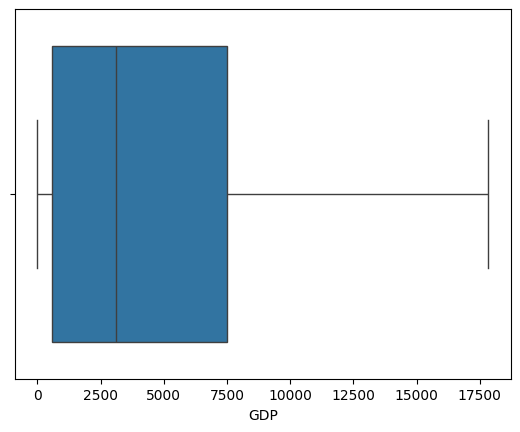

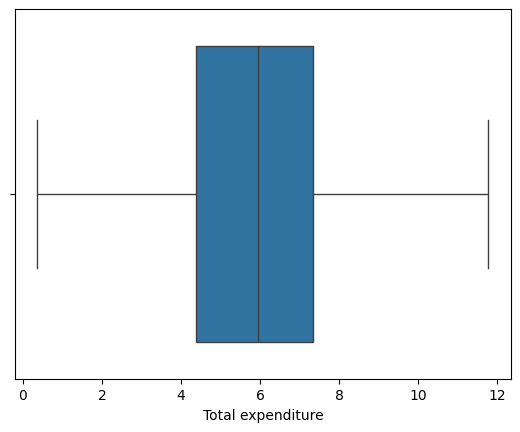

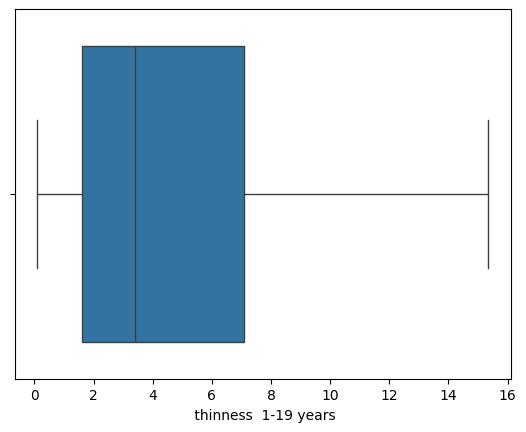

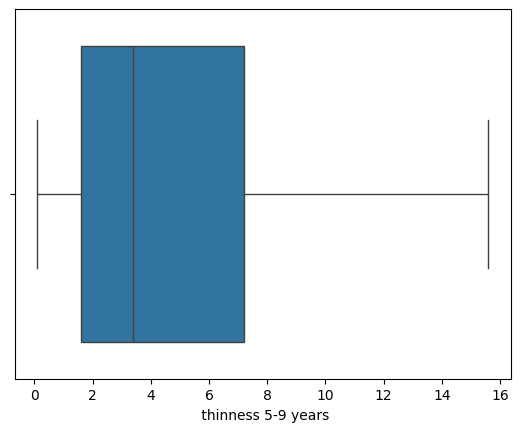

In [24]:
for i in ['GDP', 'Total expenditure', ' thinness  1-19 years', ' thinness 5-9 years']:
    sns.boxplot(data = df, x = i)
    plt.show()

In [25]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'High_Life_Expectancy'],
      dtype='object')

duplicates and garbage values 

In [26]:
df.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,High_Life_Expectancy
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1,0.0
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0,0.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9,0.0
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8,0.0
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2,0.0
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5,0.0
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0,0.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8,0.0


Encoding the data

In [27]:
dummy = pd.get_dummies(df, columns=['Country','Status'], drop_first=True)

tranining accuracy: 1.0


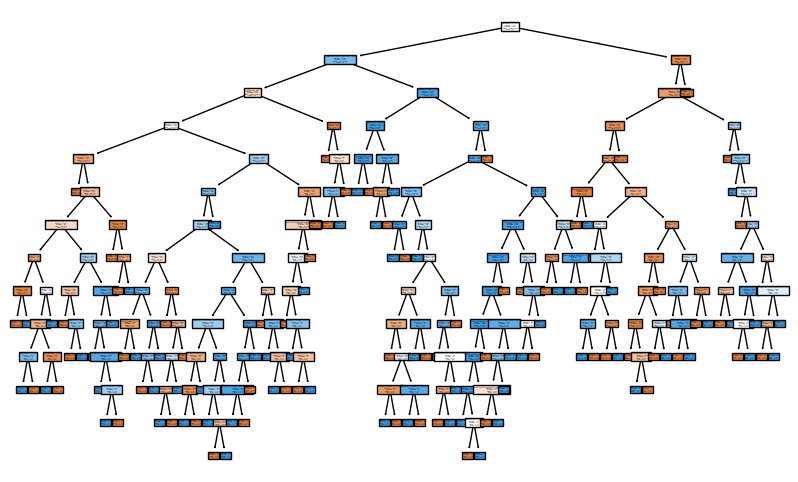

Predicted High Life Expectancy: 1.0


In [34]:
# ...existing code...
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# target and features
y = dummy["High_Life_Expectancy"]
X = dummy.drop(columns=["High_Life_Expectancy","Life expectancy "])

# encode categorical columns in X (only object/category dtypes)
encoders = {}
X_encoded = X.copy()
for col in X.select_dtypes(include=['object','category']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# ensure numeric dtype
X_encoded = X_encoded.astype(float)

# if target is categorical, encode it
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)


# model
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_encoded, y_encoded)
print("tranining accuracy:", clf.score(X_encoded, y_encoded))


# visualize (optional)
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=X_encoded.columns, class_names=[str(c) for c in target_encoder.classes_], filled=True,)
plt.show()



new_sample = {
    'Life expectancy ': 72.0,
    'Adult Mortality': 150,
    'infant deaths': 10,
    'Alcohol': 5.0,
    'percentage expenditure': 0.5,
    'Hepatitis B': 90.0,
    'Measles ': 50,
    ' BMI ': 22.0,
    'under-five deaths ': 8,
    'Polio': 95.0,
    'Total expenditure': 4.0,
    'Diphtheria ': 93.0,
    ' HIV/AIDS': 0.5,
    'GDP': 3000.0,
    'Population': 5000000,
    ' thinness  1-19 years': 4.0,
    ' thinness 5-9 years': 3.5,
    'Income composition of resources': 0.7,
    'Schooling': 12.0,
    
    'Country_Afghanistan': 0,
    'Country_Albania': 0,
    'Status_Developing': 1
}
new_sample_df = pd.DataFrame([new_sample])

# Align columns to training features and fill missing with 0
features = X_encoded.columns.tolist()
new_aligned = new_sample_df.reindex(columns=features, fill_value=0).copy()

# Safely apply encoders (fall back to mode value if unseen)
for col in features:
    if col in encoders:
        le = encoders[col]
        val = new_aligned.loc[0, col]
        try:
            new_aligned.loc[0, col] = le.transform([val])[0]
        except Exception:
            # fallback: use training mode (most frequent) encoded value
            mode_val = X[col].mode().iloc[0]
            try:
                new_aligned.loc[0, col] = le.transform([mode_val])[0]
            except Exception:
                new_aligned.loc[0, col] = 0

# ensure numeric dtype and same column order
new_aligned = new_aligned[features].astype(float)

prediction = clf.predict(new_aligned)
predicted_class = target_encoder.inverse_transform(prediction)
print("Predicted High Life Expectancy:", predicted_class[0])
# ...existing code...
